# Predictive Sentiment
## Exploratory Data Analysis
### Zamena Jaffer

#### Data Dictionary

Title - The title of the article as is on the content hub

Published Date - The date which the article was published

Evergreen Score - A ranking score developed by BuzzSumo (a tool used to pull data to build this dataset). It measures the number of social shares and backlinks an article receives more than one month after it is published. The higher the engagements after the initial 30-day period after publication, the higher the Evergreen Score.

Total Shares - The total number of social shares an article recieved

Num Words - The total count of words in the given article

Num Linking Domains - The number of outbound links included in this article

Page Views - Total number of pageviews the article recieved in the last 5 years

Avg Time On Page - The average amount of time spent on the article page by visitors

Adorescore - A number score given to a piece of text, ranked from -100 to 100 (100 being the most positive).

Emotional Coverage - The percentage of text analaysed that expresses any type of emotion

High/Medium/Low Intensity - A measurement of how intensely the emotion is expressed

'Emotion' Index - A quantitive measurement of how much each emotion is felt (out of 8 overall emotions)

In this notebook, I will import and combine my datasets, explore my data and identify any shortcomings, assumptions and next steps for this project.

I will start by reading in my data sets

In [131]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [132]:
# Importing the dataset that holds data around article performance, including pageviews, time on page, shares, etc...
articles = pd.read_csv('data/article_data.csv')

# Importing the dataset that contains data on the sentiment expressed in article titles
sentiment = pd.read_csv('data/article_title_sentiment.csv')

In [133]:
# Making sure the datasets have been imported as data frames
print(type(articles))
print(type(sentiment))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [134]:
# Checking the data that has been imported
articles.head()

,title,published_date,evergreen_score,total_shares,num_words,num_linking_domains,page_views,avg_time_on_page
0,“A teacher affects eternity …”,10/05/2018,1.584843,28,246,NaN,"1,330",00:02:05
1,“There’s always hope to be found”,10/11/2017,0.422225,4,398,NaN,"2,211",00:02:13
2,"“When women move forward, the world moves with...",08/03/2017,NaN,57,562,NaN,"2,245",00:03:15
3,$2 billion for Baytown: Inside the investment,02/05/2019,3.038422,5594,90,2.0,"274,929",00:01:45
4,10 Things you might not know about natural gas,16/08/2018,2.851552,2892,714,2.0,"461,145",00:02:51


In [135]:
sentiment.head()

,title,Adorescore,Emotional Coverage,High Intensity,Medium Intensity,Low Intensity,Joy Index,Trust Index,Interest Index,Surprise Index,Sadness Index,Disgust Index,Anger Index,Apprehension Index
0,“A teacher affects eternity …”,20,50.00%,0.00%,15.38%,84.62%,32,22,12,21,0,0,8,37
1,“There’s always hope to be found”,45,25.00%,14.29%,28.57%,57.14%,65,32,17,21,0,0,8,0
2,"“When women move forward, the world moves with...",23,40.00%,0.00%,16.67%,83.33%,34,13,17,21,7,0,8,16
3,$2 billion for Baytown: Inside the investment,37,41.67%,0.00%,18.18%,81.82%,32,20,37,21,0,0,8,0
4,10 Things you might not know about natural gas,-33,33.33%,11.11%,11.11%,77.78%,41,9,0,18,91,2,10,31


In [136]:
# Exploring data types
articles.dtypes

title                   object
published_date          object
evergreen_score        float64
total_shares             int64
num_words                int64
num_linking_domains    float64
page_views              object
avg_time_on_page        object
dtype: object

In [137]:
sentiment.dtypes

title                 object
Adorescore             int64
Emotional Coverage    object
High Intensity        object
Medium Intensity      object
Low Intensity         object
Joy Index              int64
Trust Index            int64
Interest Index         int64
Surprise Index         int64
Sadness Index          int64
Disgust Index          int64
Anger Index            int64
Apprehension Index     int64
dtype: object

In [138]:
# Investigating the shape of the data - both datasets should have the same number of rows (for the same # of articles)
print(articles.shape)
print(sentiment.shape)

(440, 8)
(440, 14)


Now that I've had a look at my data and confirmed that the number of rows align, I can merge the datasets and explore both sentiment and performance data for each article in one view.

In [139]:
# Merging the datasets with an inner join on "title"
article_sentiment = articles.merge(sentiment)

In [140]:
print(articles.shape)
print(sentiment.shape)
print(article_sentiment.shape)

(440, 8)
(440, 14)
(492, 21)


After merging the two datasets, we can see that the columns for the new data set have correctly been combined, but we now have 52 new rows.
This is surprising as the "title" column for both datasets were identical. 

Next, I'll explore where these 52 new rows came from.

In [141]:
article_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                492 non-null    object 
 1   published_date       492 non-null    object 
 2   evergreen_score      421 non-null    float64
 3   total_shares         492 non-null    int64  
 4   num_words            492 non-null    int64  
 5   num_linking_domains  272 non-null    float64
 6   page_views           486 non-null    object 
 7   avg_time_on_page     486 non-null    object 
 8   Adorescore           492 non-null    int64  
 9   Emotional Coverage   492 non-null    object 
 10  High Intensity       492 non-null    object 
 11  Medium Intensity     492 non-null    object 
 12  Low Intensity        492 non-null    object 
 13  Joy Index            492 non-null    int64  
 14  Trust Index          492 non-null    int64  
 15  Interest Index       492 non-null    int

In [142]:
# Investigating any duplicate values for the "title" column
article_sentiment.title.duplicated().sum()

78

In [143]:
# Zoning into the duplicated rows
article_sentiment[article_sentiment.duplicated()]

,title,published_date,evergreen_score,total_shares,num_words,num_linking_domains,page_views,avg_time_on_page,Adorescore,Emotional Coverage,...,Medium Intensity,Low Intensity,Joy Index,Trust Index,Interest Index,Surprise Index,Sadness Index,Disgust Index,Anger Index,Apprehension Index
7,5 small changes to maximize your car’s fuel,04/10/2018,4.422966e+00,623,325,NaN,"629,558",00:06:23,25,33.33%,...,20.00%,80.00%,41,14,0,21,0,0,8,0
9,5 small changes to maximize your car’s fuel,04/10/2018,2.879875e-01,156,337,NaN,"629,558",00:06:23,25,33.33%,...,20.00%,80.00%,41,14,0,21,0,0,8,0
11,8 Tips to drive smarter and save fuel,13/06/2019,9.337037e-01,1965,59,NaN,"120,006",00:09:00,61,63.64%,...,23.08%,61.54%,36,71,65,21,0,0,8,0
13,8 Tips to drive smarter and save fuel,13/06/2019,0.000000e+00,0,71,NaN,"120,006",00:09:00,61,63.64%,...,23.08%,61.54%,36,71,65,21,0,0,8,0
25,A look inside our energy future,23/09/2019,5.048053e+00,231,714,1.0,"65,071",00:03:17,23,66.67%,...,18.18%,81.82%,40,7,2,21,0,0,8,0
27,A look inside our energy future,23/09/2019,3.198339e-01,6,678,NaN,"65,071",00:03:17,23,66.67%,...,18.18%,81.82%,40,7,2,21,0,0,8,0
33,A new collaboration to fight COVID-19,06/04/2020,1.220056e+00,687,412,4.0,"270,546",00:03:10,-15,55.56%,...,33.33%,41.67%,41,70,39,24,100,16,68,0
35,A new collaboration to fight COVID-19,06/04/2020,1.000000e-08,1,361,NaN,"270,546",00:03:10,-15,55.56%,...,33.33%,41.67%,41,70,39,24,100,16,68,0
55,Algae hits the scale,13/04/2018,5.059645e+00,4063,127,3.0,"1,975,309",00:02:42,-62,57.14%,...,36.36%,45.45%,34,9,0,33,63,71,74,40
57,Algae hits the scale,13/04/2018,1.000000e-08,1,361,NaN,"1,975,309",00:02:42,-62,57.14%,...,36.36%,45.45%,34,9,0,33,63,71,74,40


In [144]:
# All sentiment and most performance data are the same for the duplicated article titles, therefore we can drop them
article_sentiment.drop_duplicates(inplace=True)

Now that we have identified and dropped rows where the article title has been duplicated, we are back to the expected number of rows.

Next, let's explore any other null values we identified earlier.

In [145]:
article_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 491
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                440 non-null    object 
 1   published_date       440 non-null    object 
 2   evergreen_score      370 non-null    float64
 3   total_shares         440 non-null    int64  
 4   num_words            440 non-null    int64  
 5   num_linking_domains  251 non-null    float64
 6   page_views           434 non-null    object 
 7   avg_time_on_page     434 non-null    object 
 8   Adorescore           440 non-null    int64  
 9   Emotional Coverage   440 non-null    object 
 10  High Intensity       440 non-null    object 
 11  Medium Intensity     440 non-null    object 
 12  Low Intensity        440 non-null    object 
 13  Joy Index            440 non-null    int64  
 14  Trust Index          440 non-null    int64  
 15  Interest Index       440 non-null    int

I can see that there are some null vlaues for "evergreen_score", "num_linking_domains", "page_views" and "avg_time_on_page".

"evergreen_score" & "num_linking_domains" are both values pulled on an articles format/build. Null values here indicate that the article either recieved an Evergreen score of 0 or include 0 linking domains in the article.

Null values for "page_views" and "avg_time_on_page" indicate that these pages are not articles, and are instead category pages. Data on these pages are not relevant for this analyses.

In [146]:
# Replacing NaN values for "evergreen_score" and "num_linking_domains"
article_sentiment.evergreen_score.fillna(value=0, inplace=True)
article_sentiment.num_linking_domains.fillna(value=0, inplace=True)

article_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 491
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                440 non-null    object 
 1   published_date       440 non-null    object 
 2   evergreen_score      440 non-null    float64
 3   total_shares         440 non-null    int64  
 4   num_words            440 non-null    int64  
 5   num_linking_domains  440 non-null    float64
 6   page_views           434 non-null    object 
 7   avg_time_on_page     434 non-null    object 
 8   Adorescore           440 non-null    int64  
 9   Emotional Coverage   440 non-null    object 
 10  High Intensity       440 non-null    object 
 11  Medium Intensity     440 non-null    object 
 12  Low Intensity        440 non-null    object 
 13  Joy Index            440 non-null    int64  
 14  Trust Index          440 non-null    int64  
 15  Interest Index       440 non-null    int

In [147]:
# Dropping rows where "page_views" and "avg_time_on_page" have null values as they aren't useful for this analysis
article_sentiment.dropna(inplace=True)

article_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 491
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                434 non-null    object 
 1   published_date       434 non-null    object 
 2   evergreen_score      434 non-null    float64
 3   total_shares         434 non-null    int64  
 4   num_words            434 non-null    int64  
 5   num_linking_domains  434 non-null    float64
 6   page_views           434 non-null    object 
 7   avg_time_on_page     434 non-null    object 
 8   Adorescore           434 non-null    int64  
 9   Emotional Coverage   434 non-null    object 
 10  High Intensity       434 non-null    object 
 11  Medium Intensity     434 non-null    object 
 12  Low Intensity        434 non-null    object 
 13  Joy Index            434 non-null    int64  
 14  Trust Index          434 non-null    int64  
 15  Interest Index       434 non-null    int

Now that the data has been merged and sorted, we can start to analyse and visualise the dataset and identify trends within the dataset.

In [148]:
# Renaming sentiment features to make them easier to work with for analyses
article_sentiment.rename(columns={'Adorescore':'adorescore', 'Emotional Coverage':'emotional_coverage', 'High Intensity':'high_intensity', 'Medium Intensity':'medium_intensity', 'Low Intensity':'low_intensity', 'Joy Index':'joy_index', 'Trust Index':'trust_index', 'Interest Index':'interest_index', 'Surprise Index':'surprise_index', 'Sadness Index':'sadness_index', 'Disgust Index':'disgust_index', 'Anger Index':'anger_index', 'Apprehension Index':'apprehension_index'}, inplace=True)

In [149]:
# I also noticed that some features have been read in as objects instead of integers.
# Converting these values to the correct data type

article_sentiment['emotional_coverage'] = article_sentiment['emotional_coverage'].str.rstrip('%').astype('float') / 100
article_sentiment['high_intensity'] = article_sentiment['high_intensity'].str.rstrip('%').astype('float') / 100
article_sentiment['medium_intensity'] = article_sentiment['medium_intensity'].str.rstrip('%').astype('float') / 100
article_sentiment['low_intensity'] = article_sentiment['low_intensity'].str.rstrip('%').astype('float') / 100
article_sentiment['page_views'] = article_sentiment['page_views'].str.replace(',', '').astype(float)

In [150]:
# Introducing a share_rate column to place articles that had paid support behind them and articles that didn't on the same level

article_sentiment['share_rate'] = (article_sentiment['total_shares'] / article_sentiment['page_views'])*100

In [151]:
article_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 491
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                434 non-null    object 
 1   published_date       434 non-null    object 
 2   evergreen_score      434 non-null    float64
 3   total_shares         434 non-null    int64  
 4   num_words            434 non-null    int64  
 5   num_linking_domains  434 non-null    float64
 6   page_views           434 non-null    float64
 7   avg_time_on_page     434 non-null    object 
 8   adorescore           434 non-null    int64  
 9   emotional_coverage   434 non-null    float64
 10  high_intensity       434 non-null    float64
 11  medium_intensity     434 non-null    float64
 12  low_intensity        434 non-null    float64
 13  joy_index            434 non-null    int64  
 14  trust_index          434 non-null    int64  
 15  interest_index       434 non-null    int

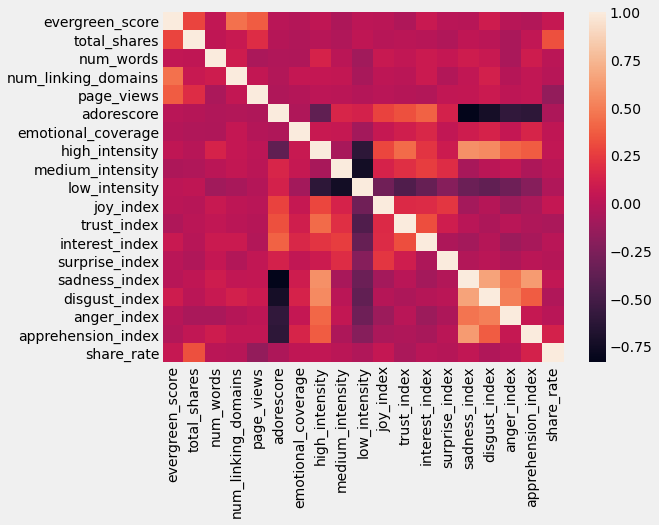

In [152]:
sns.heatmap(article_sentiment.corr());

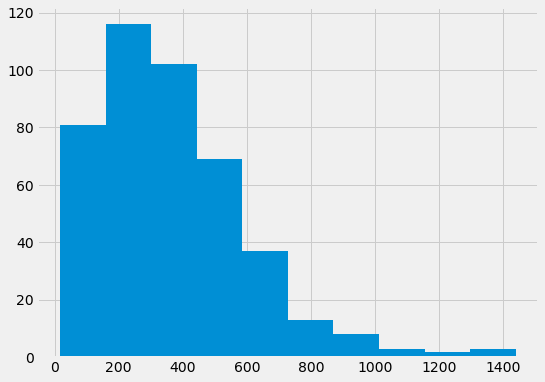

In [153]:
article_sentiment.num_words.hist();

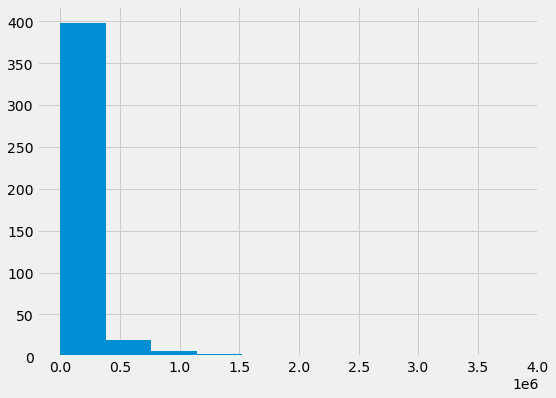

In [154]:
article_sentiment.page_views.hist();

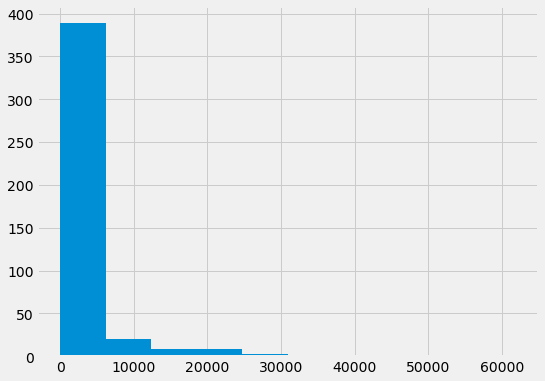

In [155]:
article_sentiment.total_shares.hist();

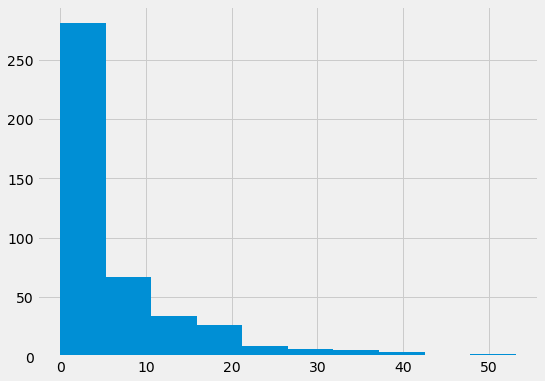

In [156]:
article_sentiment.share_rate.hist();

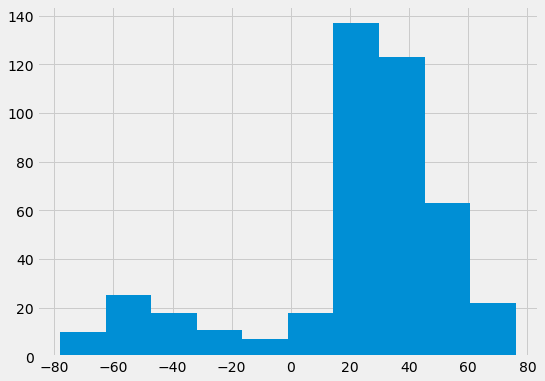

In [157]:
article_sentiment.adorescore.hist();

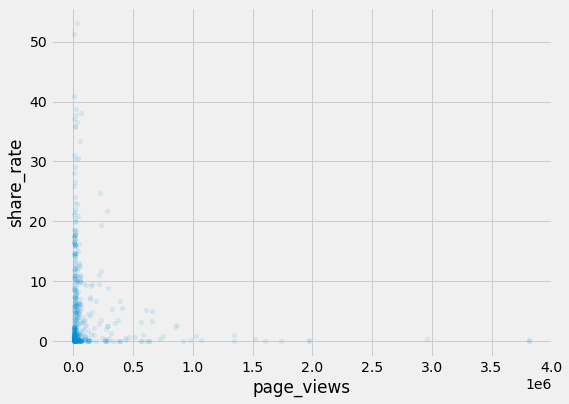

In [158]:
article_sentiment.plot(kind='scatter', x='page_views', y='share_rate', alpha=0.1);

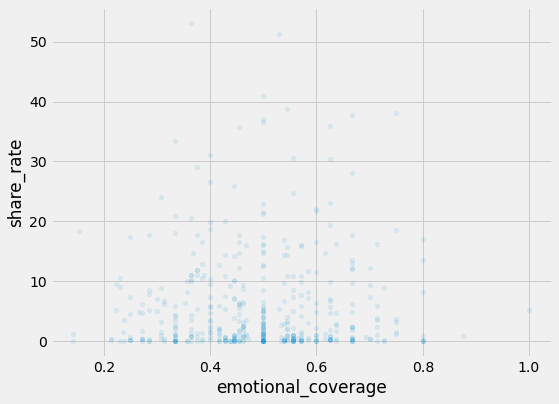

In [159]:
article_sentiment.plot(kind='scatter', x='emotional_coverage', y='share_rate', alpha=0.1);

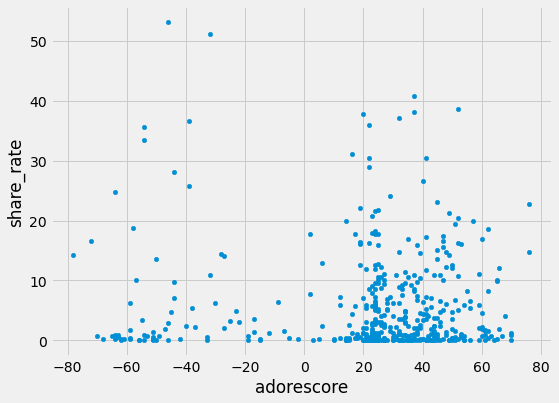

In [160]:
article_sentiment.plot(kind='scatter', x='adorescore', y='share_rate');

In [161]:
feature_cols = ['adorescore']

X = article_sentiment[feature_cols]
y = article_sentiment.share_rate

lr = LinearRegression()
lr.fit(X, y)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X)

print('Model Accuracy:', lr.score(X, y))

NameError: name 'LinearRegression' is not defined

In [162]:
# Exploring Linear Regression, plotting shares with emotional states

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

feature_cols = ['joy_index', 'trust_index', 'interest_index', 'surprise_index', 'sadness_index', 'disgust_index', 'anger_index', 'apprehension_index']

X = article_sentiment[feature_cols]
y = article_sentiment.share_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Train Model Accuracy:', lr.score(X_train, y_train))
print('Test Model Accuracy:', lr.score(X_test, y_test))

y Intercept: 4.456692464278007
Coefficient [ 0.05103555 -0.03692221  0.01658729 -0.03405657 -0.0160305  -0.02647157
  0.04023282  0.06668114]
Mean Absolute Error: 6.384580894847009
Mean Squared Error: 71.23366786219756
Root Mean Squared Error: 8.44000402027141
Train Model Accuracy: 0.031081563113725785
Test Model Accuracy: 0.03583622276951948


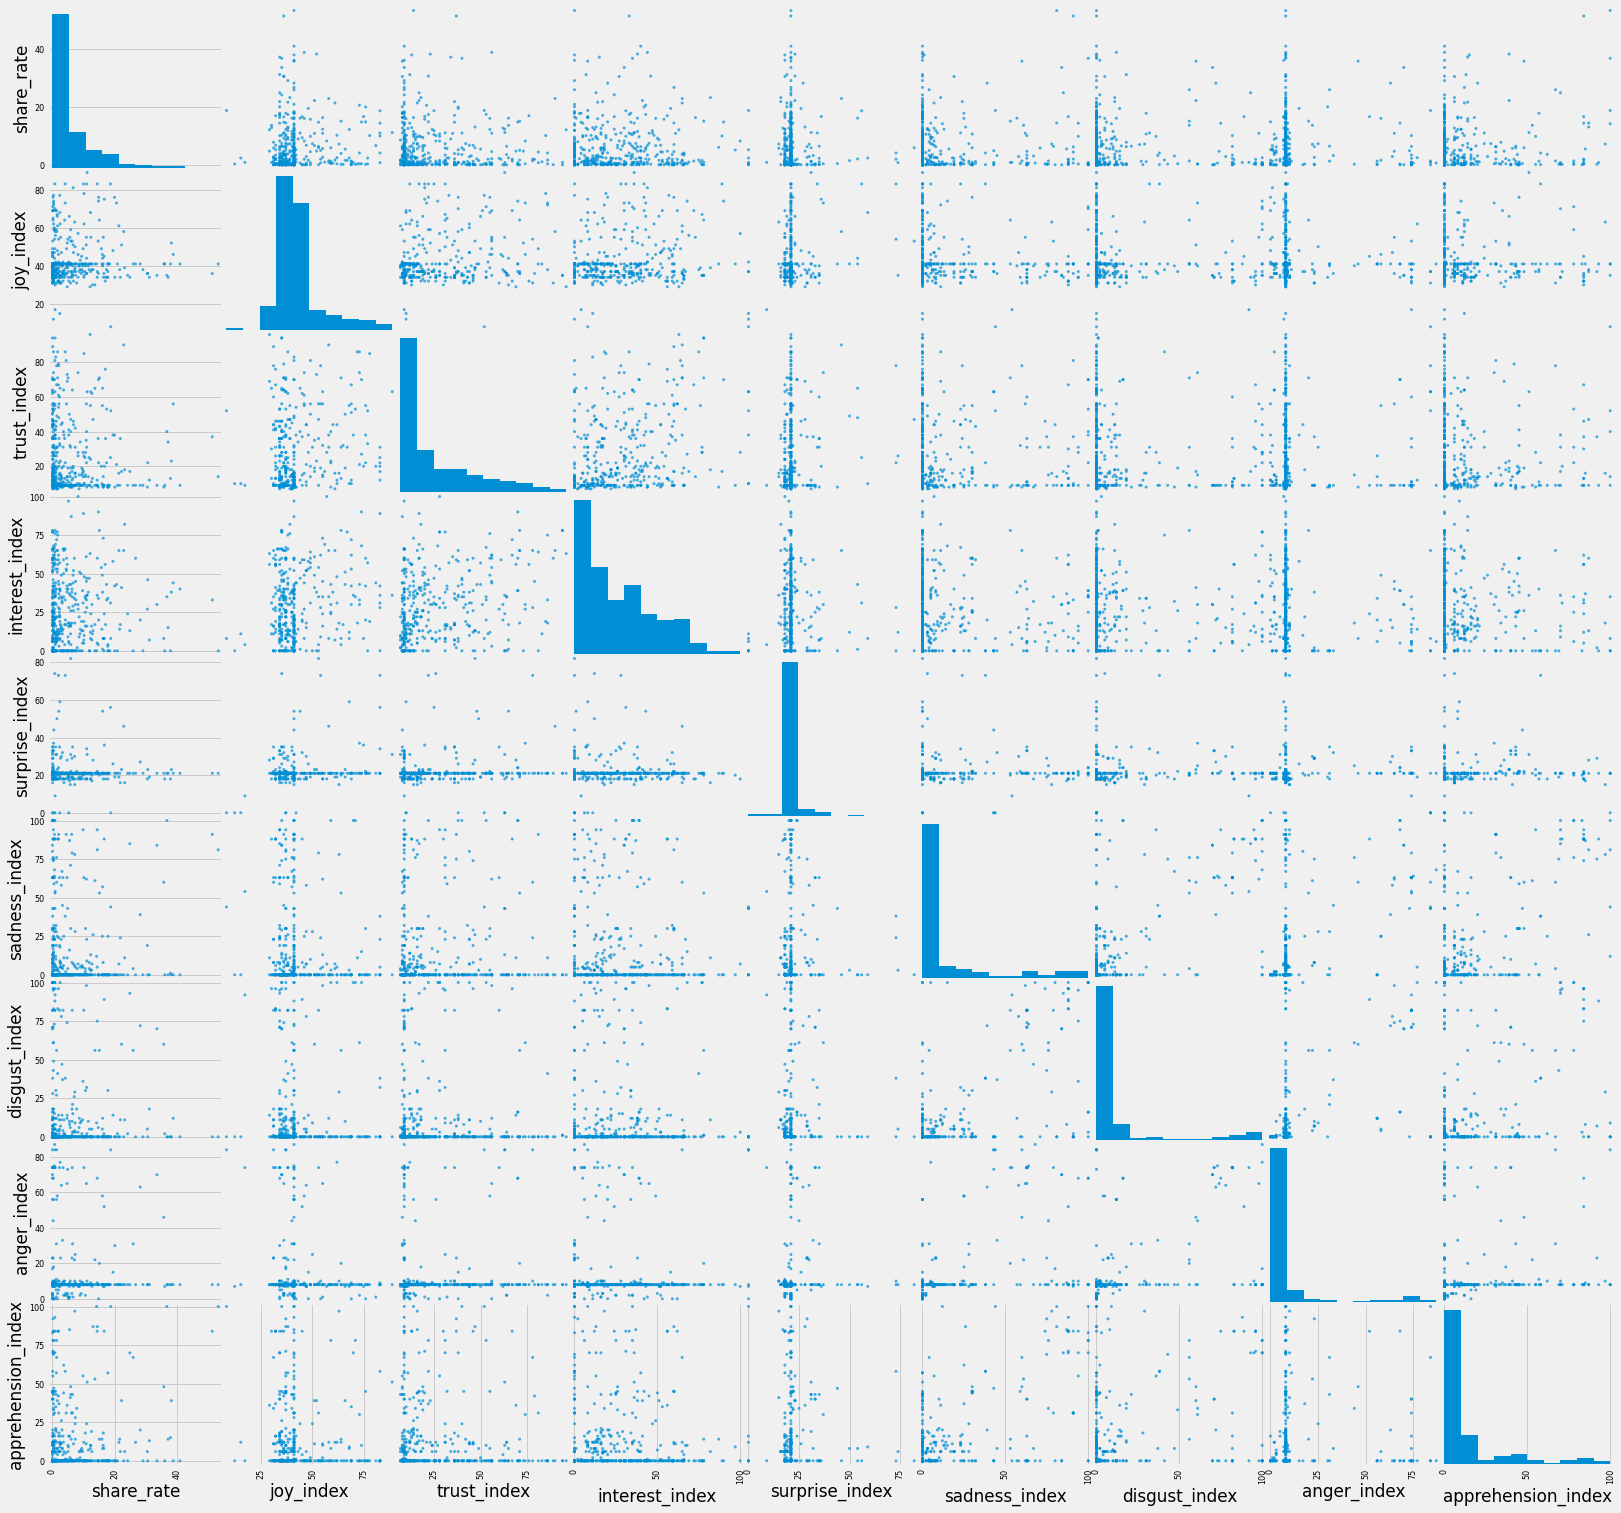

In [163]:
pd.plotting.scatter_matrix(article_sentiment[['share_rate'] + feature_cols], figsize=(25, 25), alpha=0.7);

Exploring this dataset using all states of emotion generates an extremely low accuracy score. It is possible that I am overfitting the models and ignoring several features from my dataset.

Let's explore using some other features.

In [164]:
feature_cols = ['num_words', 'adorescore', 'emotional_coverage']

X = article_sentiment[feature_cols]
y = article_sentiment.share_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Train Model Accuracy:', lr.score(X_train, y_train))
print('Test Model Accuracy:', lr.score(X_test, y_test))

y Intercept: 7.302792611845381
Coefficient [-2.70882623e-04 -1.43886083e-02 -1.40971168e+00]
Mean Absolute Error: 6.498341197570757
Mean Squared Error: 75.14906052427482
Root Mean Squared Error: 8.668855779413729
Train Model Accuracy: 0.0033716356395870895
Test Model Accuracy: -0.017159500905861824


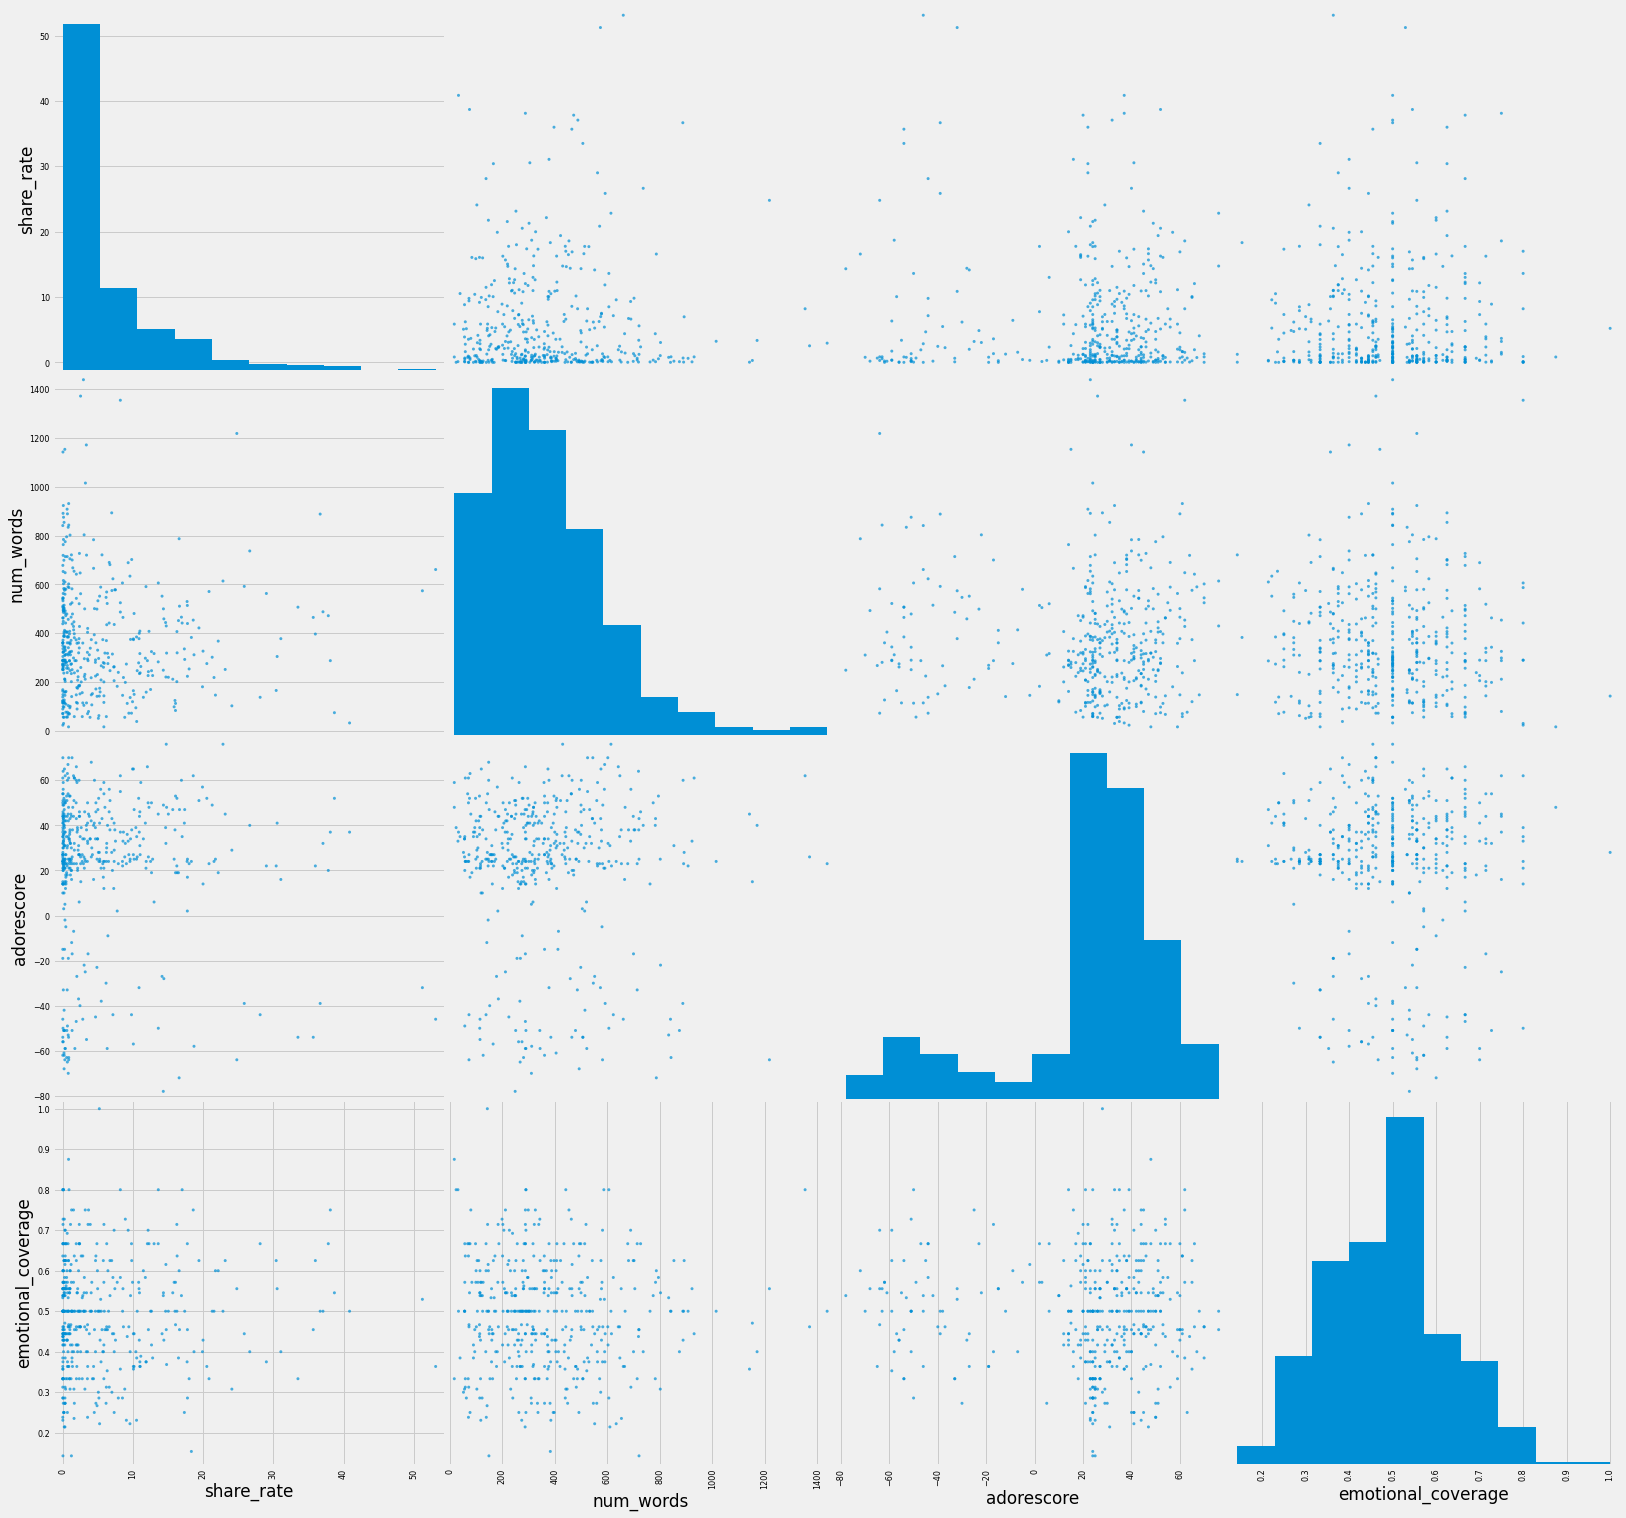

In [165]:
pd.plotting.scatter_matrix(article_sentiment[['share_rate'] + feature_cols], figsize=(25, 25), alpha=0.7);

In [166]:
feature_cols = ['joy_index', 'sadness_index', 'anger_index', 'trust_index']

X = article_sentiment[feature_cols]
y = article_sentiment.share_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Train Model Accuracy:', lr.score(X_train, y_train))
print('Test Model Accuracy:', lr.score(X_test, y_test))

y Intercept: 4.787057458126634
Coefficient [ 0.04949135  0.0118004  -0.00013454 -0.03521709]
Mean Absolute Error: 6.428839436805473
Mean Squared Error: 74.56845220075667
Root Mean Squared Error: 8.635302669898529
Train Model Accuracy: 0.010204270248701075
Test Model Accuracy: -0.00930083616073496


These models also returns low accuracy.

I'll now try scaling the data to see if this will have any effect.

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
article_sentiment[['share_rate', 'joy_index', 'trust_index', 'interest_index', 'surprise_index', 'sadness_index', 'disgust_index', 'anger_index', 'apprehension_index']] = scaler.fit_transform(article_sentiment[['share_rate', 'joy_index', 'trust_index', 'interest_index', 'surprise_index', 'sadness_index', 'disgust_index', 'anger_index', 'apprehension_index']])

print(article_sentiment.head())

# Attempting Logisitc Regression
feature_cols = ['joy_index', 'trust_index', 'interest_index', 'surprise_index', 'sadness_index', 'disgust_index', 'anger_index', 'apprehension_index']

X = article_sentiment[feature_cols]
y = article_sentiment.share_rate

print('Logistic Regression')
lr = LinearRegression()
lr.fit(X, y)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X)

print('Model Accuracy:', lr.score(X, y))

# With train/test split
print('Train/Test Split LR')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Train Model Accuracy:', lr.score(X_train, y_train))
print('Test Model Accuracy:', lr.score(X_test, y_test))

                                               title published_date  \
0                    “A teacher affects eternity …”      10/05/2018   
1                 “There’s always hope to be found”      10/11/2017   
2  “When women move forward, the world moves with...     08/03/2017   
3     $2 billion for Baytown: Inside the investment      02/05/2019   
4    10 Things you might not know about natural gas      16/08/2018   

   evergreen_score  total_shares  num_words  num_linking_domains  page_views  \
0         1.584843            28        246                  0.0      1330.0   
1         0.422225             4        398                  0.0      2211.0   
2         0.000000            57        562                  0.0      2245.0   
3         3.038422          5594         90                  2.0    274929.0   
4         2.851552          2892        714                  2.0    461145.0   

  avg_time_on_page  adorescore  emotional_coverage  ...  low_intensity  \
0         00:02:05

Scaling the data had some effect, where instead of generating model acurracy scores of less than 1%, we recieve scores of around 3%.

Whilst this is a significant imporvement, these accuary scores are still extremely low - indicating that there is little correlation between sentiment and share rate.

In [168]:
# Identifying the most commonly used words in the article titles

high_freq = pd.Series(' '.join(article_sentiment['title']).lower().split()).value_counts()[:60]
high_freq

the             163
a                95
to               78
of               73
energy           61
in               55
and              45
for              41
on               31
new              26
future           21
from             19
is               19
how              19
with             18
you              17
gas              16
big              15
world            15
methane          15
natural          14
emissions        14
innovation       13
exxonmobil       13
faq:             13
fuel             12
things           12
carbon           12
algae            12
an               11
power            10
do               10
our              10
it               10
malaria          10
this              9
change            9
exxonmobil’s      8
creating          8
climate           8
tomorrow’s        8
capture           8
save              8
about             8
go                7
could             7
pioneers          7
&                 7
what              7
know              7


In [169]:
low_freq =  pd.Series(' '.join(article_sentiment['title']).lower().split()).value_counts()[-25:]
low_freq

kerosene        1
frontier        1
storm           1
mczeal:         1
ballet          1
makes           1
mobility        1
brian           1
garage          1
cracker         1
“there’s        1
china           1
professional    1
könnte          1
wild            1
detecting       1
renew           1
success         1
you,            1
change,         1
found”          1
idea            1
microbial       1
capture:        1
grows           1
dtype: int64

In [170]:
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(article_sentiment.title)
features = vect.get_feature_names()

def title_term_importance():
    
    article_id = 0
    article_titles = ' '.join(article_sentiment['title']).lower()
    
    # Create a dictionary of words and their TF–IDF scores.
    word_scores = {}
    for word in TextBlob(article_titles).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[article_id, features.index(word)]
    
    # Print words with the top ten TF–IDF scores.
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:10]
    for word, score in top_scores:
        print(word, score)

In [171]:
title_term_importance()

TOP SCORING WORDS:
teacher 0.5773502691896257
affects 0.5773502691896257
eternity 0.5773502691896257
hope 0.0
women 0.0
forward 0.0
world 0.0
moves 0.0
billion 0.0
baytown 0.0


In [172]:
vect = CountVectorizer(stop_words='english')
dtm = vect.fit_transform(article_sentiment.title)
features = vect.get_feature_names()

def title_term_count():
    
    article_id = 0
    article_titles = ' '.join(article_sentiment['title']).lower()
    
    # Create a dictionary of words and their TF–IDF scores.
    word_scores = {}
    for word in TextBlob(article_titles).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[article_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores.
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:10]
    for word, score in top_scores:
        print(word, score)

In [113]:
title_term_count()

TOP SCORING WORDS:
teacher 1
affects 1
eternity 1
hope 0
women 0
forward 0
world 0
moves 0
billion 0
baytown 0


### Shortcomings

After exploring the data and running some statistical analyses - I have found that there is little correlation between the sentiment expressed in article titles and it's impact on share rate.

### Assumptions

There does seem to be some indication that certain keywords/topics generate a higher share rate, where audiences are more likely to engage with articles written about/containing these keywords.

### Next Steps

I'll now model the accuracy of this assumption using linear regression to validate this hypothesis - allowing me to make reccomendations round the content topics that the client should write about to drive share rates (instead of investing in article sentiment).